In [3]:
import pandas as pd
import numpy as np


In [4]:
data = 'newsCorpora_with_header.csv'
df = pd.read_csv(data, encoding="utf8", sep='\t', usecols=["TITLE", "CATEGORY"])

In [5]:
print(df)

                                                    TITLE CATEGORY
0       Fed official says weak data caused by weather,...        b
1       Fed's Charles Plosser sees high bar for change...        b
2       US open: Stocks fall after Fed official hints ...        b
3       Fed risks falling 'behind the curve', Charles ...        b
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...        b
...                                                   ...      ...
422932  Surgeons to remove 4-year-old's rib to rebuild...        m
422933  Boy to have surgery on esophagus after battery...        m
422934  Child who swallowed battery to have reconstruc...        m
422935  Phoenix boy undergoes surgery to repair throat...        m
422936  Phoenix boy undergoes surgery to repair throat...        m

[422937 rows x 2 columns]


In [6]:
import texthero as hero
from texthero import preprocessing
custom_pipeline = [
                     preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_html_tags
                   , preprocessing.remove_urls
                   ]
      
df['TITLE'] = hero.clean(df['TITLE'] ,pipeline=custom_pipeline)

In [7]:
print(df)

                                                    TITLE CATEGORY
0       fed official says weak data caused weather slo...        b
1       fed charles plosser sees high bar change pace ...        b
2       us open stocks fall fed official hints acceler...        b
3       fed risks falling behind curve charles plosser...        b
4             fed plosser nasty weather curbed job growth        b
...                                                   ...      ...
422932  surgeons remove year old rib rebuild damaged t...        m
422933    boy surgery esophagus battery burns hole throat        m
422934  child swallowed battery reconstructive surgery...        m
422935  phoenix boy undergoes surgery repair throat da...        m
422936  phoenix boy undergoes surgery repair throat da...        m

[422937 rows x 2 columns]


In [8]:
df['tfidf'] = (
    hero.tfidf(df['TITLE'], max_features=100)
)
print(df)

                                                    TITLE CATEGORY  \
0       fed official says weak data caused weather slo...        b   
1       fed charles plosser sees high bar change pace ...        b   
2       us open stocks fall fed official hints acceler...        b   
3       fed risks falling behind curve charles plosser...        b   
4             fed plosser nasty weather curbed job growth        b   
...                                                   ...      ...   
422932  surgeons remove year old rib rebuild damaged t...        m   
422933    boy surgery esophagus battery burns hole throat        m   
422934  child swallowed battery reconstructive surgery...        m   
422935  phoenix boy undergoes surgery repair throat da...        m   
422936  phoenix boy undergoes surgery repair throat da...        m   

                                                    tfidf  
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [9]:
X = df['tfidf'].to_list()

type(X)

list

In [10]:
df['CATEGORY'].head(5)

0    b
1    b
2    b
3    b
4    b
Name: CATEGORY, dtype: object

In [11]:
category_ids = {}
current_id = 0
y = []

# generate label to number
for label in df['CATEGORY']:
    if not label in category_ids:
        category_ids[label] = current_id
        current_id +=1
    id_ = category_ids[label]
    y.append(id_)
    
    
category_ids

{'b': 0, 't': 1, 'e': 2, 'm': 3}

In [12]:
type(y)

list

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [16]:
dtc.score(X_test,y_test)

0.6235636260462477

In [37]:
predict = dtc.predict(X_test,check_input=True)

data = {
    'y_actual': y_test,
    'y_predicted':predict
}
df_confusion_matrix = pd.DataFrame(data)
confusion_matrix = pd.crosstab(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

# Decision Tree Result of Confusion Matrix
print('True Positive (TP): ',confusion_matrix[1][1])
print('False Negative (FN): ',confusion_matrix[1][0])
print('False Positive (FP): ',confusion_matrix[0][1])
print('True Negative (TN): ',confusion_matrix[0][0])


True Positive (TP):  11136
False Negative (FN):  1499
False Positive (FP):  2219
True Negative (TN):  10495


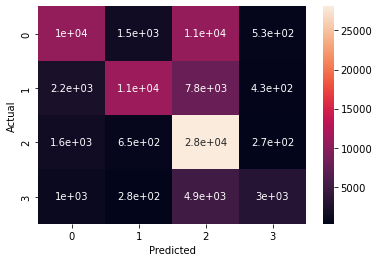

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [39]:
#Decision Tree Accuracy , Precision, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
Accuracy = accuracy_score(y_test,dtc.predict(X_test,check_input=True))
Precision = precision_score(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'],average='macro')
Recall = recall_score(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'],average="macro")
F1_score = f1_score(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'],average='macro')


print ("The Accuracy of the model is: ",Accuracy)
print ("The Precision Score of the model is: ",Precision)
print ("The Recall Score of the model is: ",Recall)
print ("The F1 Score of the model is: ",F1_score)

The Accuracy of the model is:  0.6235636260462477
The Precision Score of the model is:  0.6909596459948958
The Recall Score of the model is:  0.553688918863972
The F1 Score of the model is:  0.5780760050854676


In [40]:
from sklearn.naive_bayes import MultinomialNB

nav = MultinomialNB()

nav.fit(X_train,y_train)

MultinomialNB()

In [41]:
nav.score(X_test,y_test)

0.609554546744219

In [42]:
nav_predict = nav.predict(X_test)

nav_data = {
    'y_actual': y_test,
    'y_predicted':nav_predict
}
df_nav_confusion_matrix = pd.DataFrame(nav_data)
nav_confusion_matrix = pd.crosstab(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

# Nav Bayes Result of Confusion Matrix

print('True Positive (TP): ',nav_confusion_matrix[1][1])
print('False Negative (FN): ',nav_confusion_matrix[1][0])
print('False Positive (FP): ',nav_confusion_matrix[0][1])
print('True Negative (TN): ',nav_confusion_matrix[0][0])

True Positive (TP):  10057
False Negative (FN):  1232
False Positive (FP):  2778
True Negative (TN):  10388


In [43]:
Accuracy = accuracy_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'])
Precision = precision_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'],average='macro')
Recall = recall_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'],average="macro")
F1_score = f1_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'],average='macro')

# Nav Bayes Accuracy , Precision, Recall and F1 Score
print ("The Accuracy of the model is: ",Accuracy)
print ("The Precision Score of the model is: ",Precision)
print ("The Recall Score of the model is: ",Recall)
print ("The F1 Score of the model is: ",F1_score)

The Accuracy of the model is:  0.609554546744219
The Precision Score of the model is:  0.6867330624619625
The Recall Score of the model is:  0.534799816638781
The F1 Score of the model is:  0.5578429655031804


In [44]:
 from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=300)

In [45]:
ann.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=300)

In [46]:
ann.score(X_test,y_test)

0.6187520688513737

In [47]:
ann_predict = ann.predict(X_test)

ann_data = {
    'y_actual': y_test,
    'y_predicted':ann_predict
}
df_ann_confusion_matrix = pd.DataFrame(ann_data)
ann_confusion_matrix = pd.crosstab(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

# ANN Result of Confusion Matrix

print('True Positive (TP): ',ann_confusion_matrix[1][1])
print('False Negative (FN): ',ann_confusion_matrix[1][0])
print('False Positive (FP): ',ann_confusion_matrix[0][1])
print('True Negative (TN): ',ann_confusion_matrix[0][0])

True Positive (TP):  11145
False Negative (FN):  1724
False Positive (FP):  2226
True Negative (TN):  10397


In [29]:
Accuracy = accuracy_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'])
Precision = precision_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'],average='macro')
Recall = recall_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'],average="macro")
F1_score = f1_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'],average='macro')

# ANN Accuracy , Precision, Recall and F1 Score
print ("The Accuracy of the model is: ",Accuracy)
print ("The Precision Score of the model is: ",Precision)
print ("The Recall Score of the model is: ",Recall)
print ("The F1 Score of the model is: ",F1_score)

The Accuracy of the model is:  0.6177944862155389
The Precision Score of the model is:  0.681898006370852
The Recall Score of the model is:  0.5459176699060213
The F1 Score of the model is:  0.5697299643974878
